In [30]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from pandas.plotting import scatter_matrix

In [11]:
dataset = load_wine()
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
c = df.columns

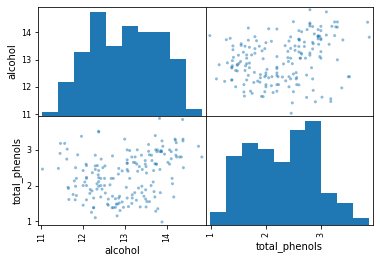

In [12]:
scatter_matrix(df.iloc[:,[0,5]])
plt.show()

In [13]:
c

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [14]:
x = df[[c[0],c[5]]]

In [15]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(x)

StandardScaler()

In [22]:
x_scaled = scale.transform(x)

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_scaled)
y_pred = kmeans.predict(x_scaled)

/home/a/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
kmeans.cluster_centers_

array([[ 0.07498401, -1.14070754],
       [ 0.92017418,  0.87087204],
       [-1.06309124,  0.06418028]])

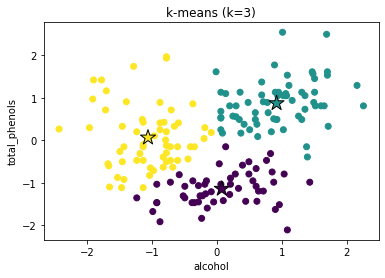

In [29]:
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=y_pred)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker="*",s=250,c=[0,1,2],edgecolors='k')
plt.xlabel(c[0])
plt.ylabel(c[5])
plt.title('k-means (k=3)')
plt.show()

In [31]:
x_new = np.array([[13,2.5]])
x_new_scaled = scale.transform(x_new)
kmeans.predict(x_new_scaled)

/home/a/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int32)